<a href="https://colab.research.google.com/github/mewael-alema/datascience365/blob/main/FBprophetVSNeuralprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FBprophet VS Neuralprophet**

In [ ]:
import pandas as pd
import seaborn as sns # For Plotting
import warnings # For disableing the waring
warnings.filterwarnings('ignore')

# **Loading Train Data**

In [ ]:
# Loading up the data
df_train = pd.read_csv("/content/drive/MyDrive/class/train.csv")
df_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


# **Understanding train data**

In [ ]:
df_train.info()
# notice that Date is in object Later will convert it in **int**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# find null value of columns and sum then up
df_train.isnull().sum()

# There is no null value in this dataFrame 

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
df_train.describe()
# There is lot of outliar cuz of close Store. Lets clean them up

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# **Processing Train Data**

In [ ]:
# We are only going to take the rows which are open 
df_train_open = df_train[df_train['Open'] == 1]
# Then will drop it as we dont need it any more
df_train_open.drop(['Open'], axis=1, inplace=True)
df_train_open.describe()
# Now the values are bit normalize

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


# **Loading Store data**

In [ ]:
# Loading up the store data
df_store = pd.read_csv("/content/drive/MyDrive/class/store.csv")
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


# **Understanding store data**

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_store.isnull().sum()
# As you can see there are lot of Null values in the dateFrame time to fix them up

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# **Dealing Null Values for Store Data**

In [ ]:
# will simple loop over the dataFrame and where there 354 null values or more
# will those values with 0 
# nan -> Zero
for col in df_store:
  if df_store[col].isnull().sum() >= 354:
    # Fillna funtion fill the nan value of the column with zero
    df_store[col].fillna(0, inplace = True)

In [ ]:
# instead of zero will fill the nan value with mean of the column
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(), inplace = True)

In [ ]:
df_store.isnull().sum()
# we have successfull treated all the null values

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# **Analizing**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60d8f17950>,
      dtype=object)

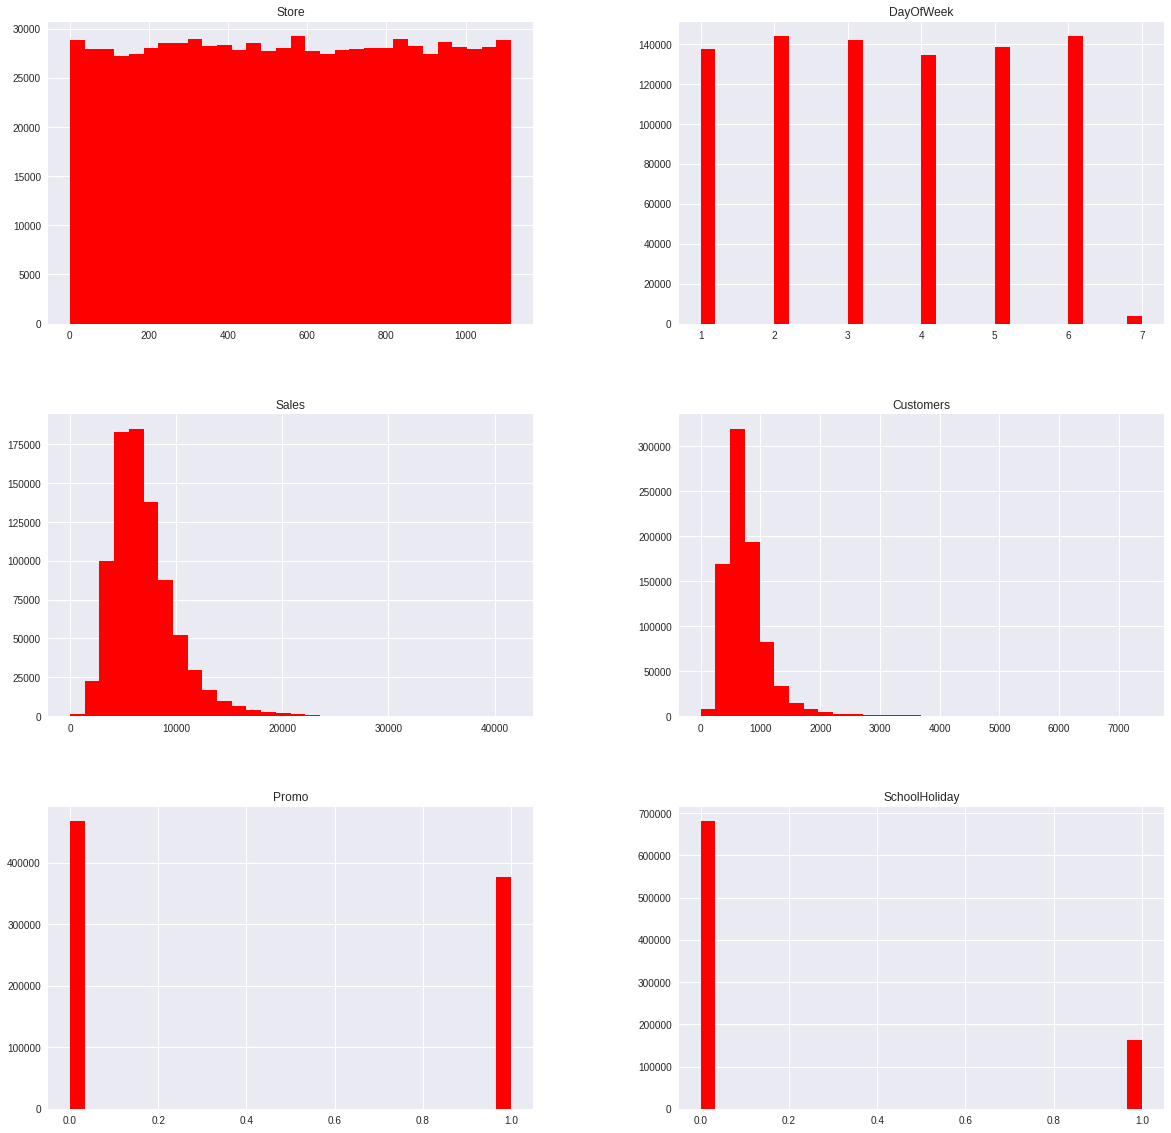

In [ ]:
df_train_open.hist(bins = 30, figsize = (20,20), color = 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60d8d74250>,
      dtype=object)

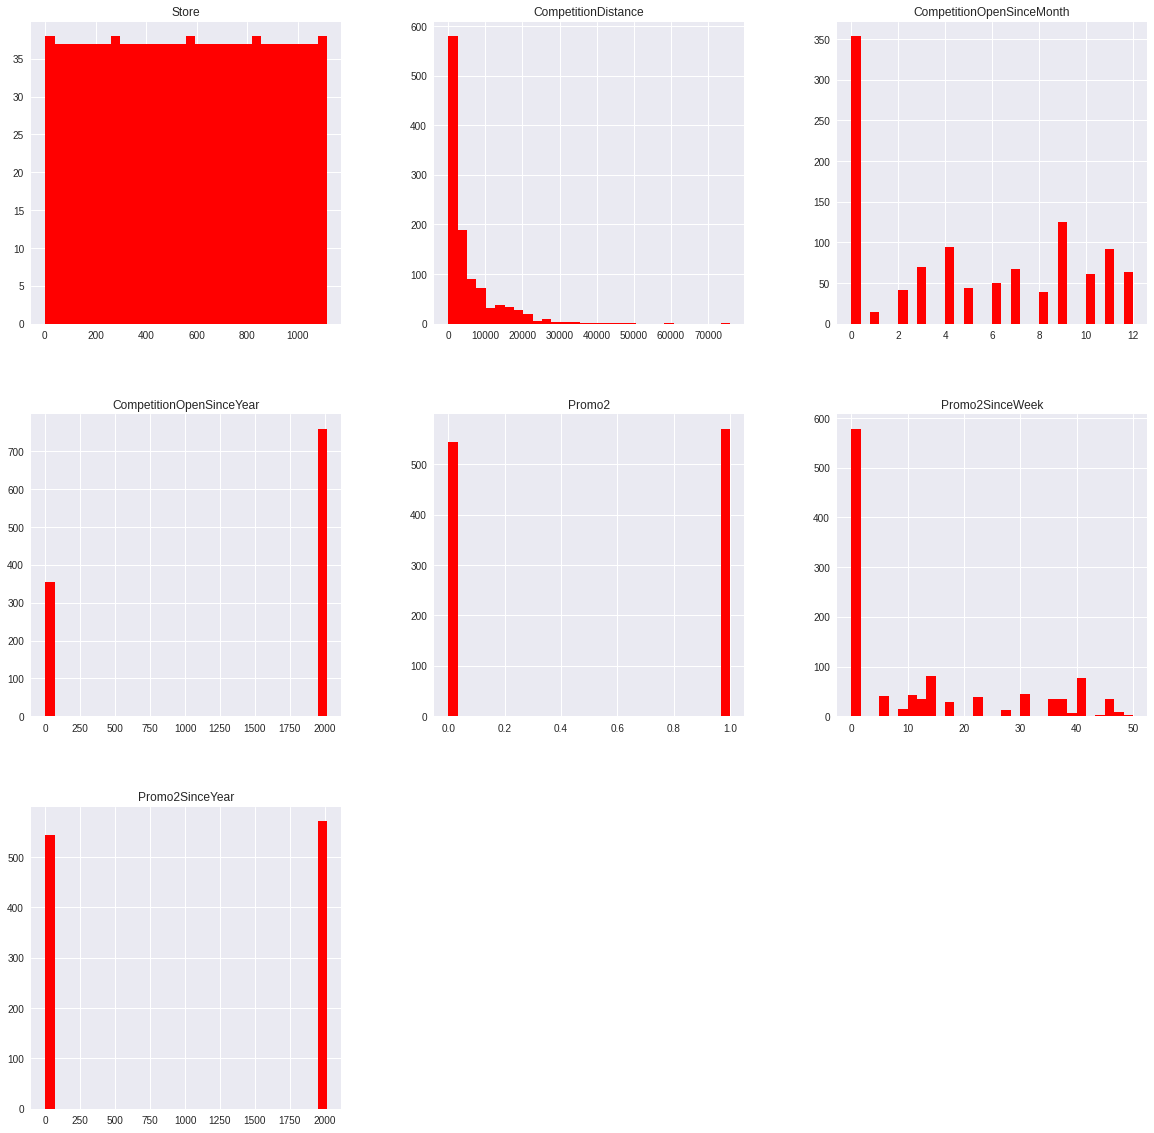

In [ ]:
df_store.hist(bins = 30, figsize = (20,20), color = 'r')

# **Merging Train and Store Dataset**

In [ ]:
# Now it time to merge our both dataframe 
df_train_store = pd.merge(df_train_open, df_store, how='inner', on ='Store') 
# it is similiar to inner joint
# so we are simply joining both dataFrame on inner on storeId
# https://www.tutorialspoint.com/sql/sql-inner-joins.htm if you want to know more about inner joint 

# **Inner Joint**
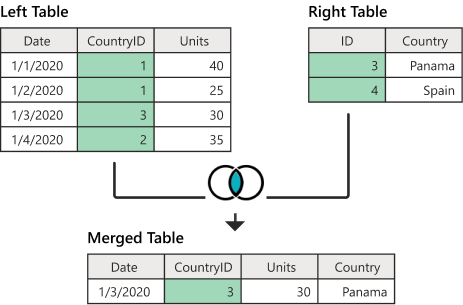

In [ ]:
df_train_store.head(2)

,Store,DayOfWeek,y,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,ds
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015-07-31
1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015-07-30


In [ ]:
# Now we can acess any store with there id
df_train_store[df_train_store["Store"] == 2].head(2)

,Store,DayOfWeek,y,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,ds
781,2,5,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31
782,2,4,5567,601,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-30


# **Processing Data For Prophet**

In [ ]:
# Now prophet have some requirement so will fullfill them
# You must also check the docs for better understanding 

# Here will convert the data object to **Int** and rename the colum to ds as per prophet requirment

df_train_store['ds'] = pd.to_datetime(df_train_store['Date'])

In [ ]:
df_train_store.drop("Date", axis=1, inplace=True)

In [ ]:
# And also rename our traget variable to y as per prophet requirment

df_train_store.rename(columns = {'Sales':'y'}, inplace=True)

In [ ]:
df_train_store.head(2)

,Store,DayOfWeek,y,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,ds
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015-07-31
1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015-07-30


# **Facebook Prophet**

In [ ]:
# DOCS: --> https://facebook.github.io/prophet/docs/quick_start.html

from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
# This will return all the function available in FBProphet class
dir(Prophet) 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
def predict_sale(_id:int, df, model, periods):
  # Acess a particular store
  data = df[df['Store'] == _id ]
  # will sort the values so our timeline is right 
  data = data.sort_values('ds')

  model.fit(data)
  future = model.make_future_dataframe(periods = periods)
  predictions = model.predict(future)
  
  # validating
  # Learn more about it
  # https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation
  df_cv = cross_validation(model, initial="35 days", period="180 days", horizon ="365 days")
  df_p = performance_metrics(df_cv)
  return predictions, df_cv, df_p 

In [ ]:
model = Prophet()
df_future, df_cv, df_p = predict_sale(10,df_train_store,model,365)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 4 forecasts with cutoffs between 2013-02-06 00:00:00 and 2014-07-31 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
df_future.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4094.392716,6205.854738,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4064.712789,6133.517757,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752


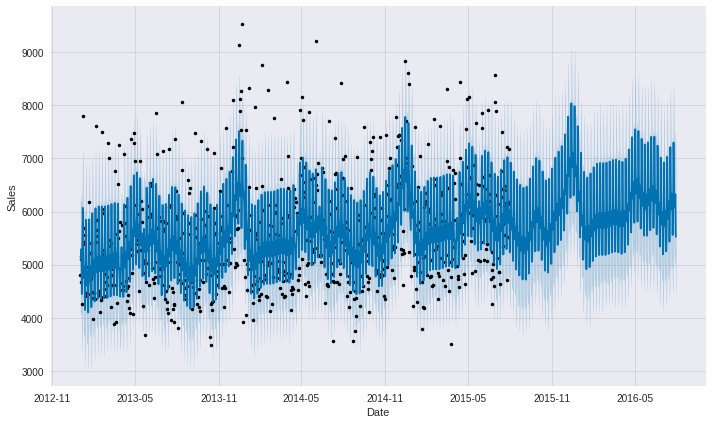

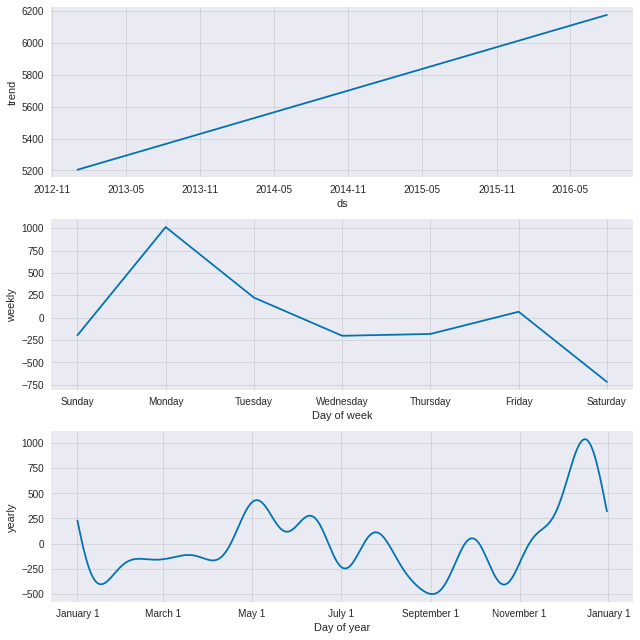

In [ ]:
figure = model.plot(df_future, xlabel='Date', ylabel='Sales')
figure2 = model.plot_components(df_future)


# How to read this graph
# So the black dot our dataPoint 
# dark blue line is the prediction
# light blue is trend space

# We have Predicted for 1 year = 365 periods

In [ ]:
# Our trend graph is an stable upward trend
# In weekly we can say  sunday to tuesday high sales and thurday to saturday low sales
# In yearly from november to december will have high sales

In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.284321e+09,47794.572034,18254.530663,3.596774,0.148693,0.534435
1,37 days,2.484497e+09,49844.729908,19518.627792,3.844689,0.146063,0.541322
2,38 days,2.665020e+09,51623.830730,20715.546850,4.154670,0.145781,0.548209
3,39 days,2.665008e+09,51623.720228,20709.042227,4.153323,0.146063,0.553719
4,40 days,2.802944e+09,52942.833875,21751.438024,4.305967,0.144637,0.557851


# **Neural Prophet**

In [ ]:
!pip install neuralprophet[live]
# live is only for colab NoteBooks

In [ ]:
# DOCS :- https://neuralprophet.com/html/contents.html

from neuralprophet import NeuralProphet

In [ ]:
# Thankfully, the API of NeuralProphet is close to identical to the original FBProphet.

# This will return all the function available in NeuralProphet class
dir(NeuralProphet)

['_NeuralProphet__handle_missing_data',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_batch_regualarizations',
 '_check_dataframe',
 '_convert_raw_predictions_to_raw_df',
 '_create_dataset',
 '_eval_true_ar',
 '_evaluate',
 '_evaluate_epoch',
 '_get_maybe_extend_periods',
 '_get_time_based_sample_weight',
 '_handle_missing_data',
 '_init_model',
 '_init_train_loader',
 '_init_val_loader',
 '_make_future_dataframe',
 '_maybe_extend_df',
 '_normalize',
 '_predict_raw',
 '_prepare_dataframe_to_predict',
 '_reshape_raw_predictions_to_forecst_df',
 '_train',
 '_train_epoch',
 '_train_minimal',
 '_validate_column_name',
 'add_country_holidays',
 'add_events',
 'add_f

In [ ]:
# will train this no 100 epochs more epochs mean better result 
# NOte more epochs will also overfit the model
model1 = NeuralProphet(epochs=1000)
data1 = df_train_store[df_train_store['Store'] == 10]
data1 = data1.sort_values('ds')
df_n = data1[["ds","y"]]

# Here is the one differens that by default Neural Prophet
# Only take two colums ds and y

model1.fit(df_n)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 80.867% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 80.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.78E-01, min: 1.00E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.78E-01, min: 1.00E+00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.78E-01, min: 1.41E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.78E-01, min: 1.41E+00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.59E-01, min: 1.09E+00
INFO:NP.utils_torch:lr-range-test results: steep: 3.59E-01, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.03E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 3.03E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:39<00:00, 10.05it/s, SmoothL1Loss=0.0201, MAE=660, RMSE=813, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.776739,4906.451565,6031.098762,0.0
1,0.537600,3823.978002,4714.887576,0.0
2,0.353508,2944.199346,3609.823850,0.0
3,0.229722,2314.585581,2812.629556,0.0
4,0.150123,1867.731652,2238.073143,0.0
...,...,...,...,...
995,0.020087,660.377012,810.676712,0.0
996,0.020087,660.391149,812.849337,0.0
997,0.020084,660.350100,810.044035,0.0
998,0.020084,660.345833,808.795527,0.0


In [ ]:
# Making the Prediction
future_neural = model1.make_future_dataframe(df=df_n,periods=365)
perdiction_neural = model1.predict(df=future_neural)
perdiction_neural.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 80.867% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 80.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-08-01,None,5325.189453,NaN,5932.133789,-80.688416,-526.256165
1,2015-08-02,None,4489.529785,NaN,5934.676758,-88.874237,-1356.273193
2,2015-08-03,None,7035.222656,NaN,5937.220215,-98.517975,1196.520874
3,2015-08-04,None,6261.516602,NaN,5939.763184,-109.579605,431.332977
4,2015-08-05,None,5811.761719,NaN,5942.306152,-122.003952,-8.540596


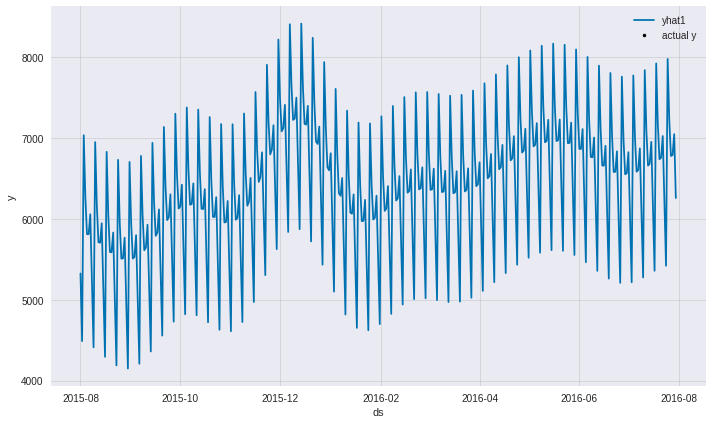

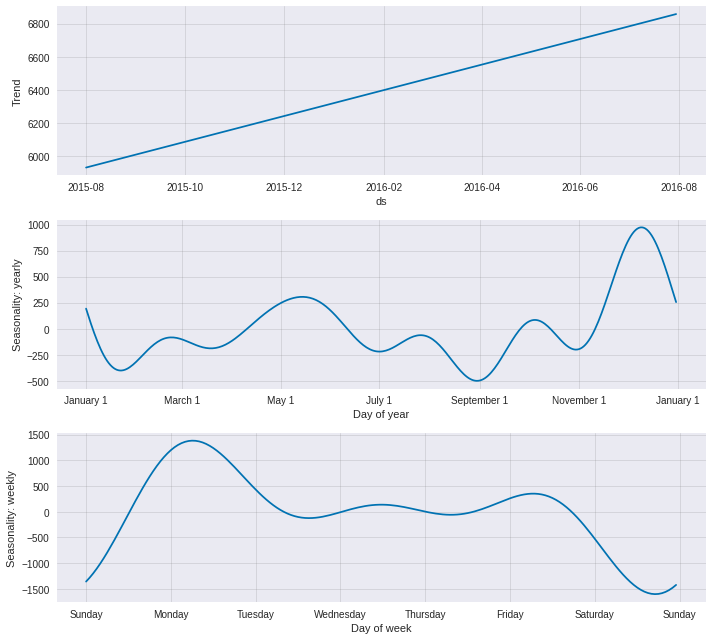

In [ ]:
plot1 = model1.plot(perdiction_neural)

# our components our trend weekly yearly
plot2 = model1.plot_components(perdiction_neural)

# Note the plot you see is just the furture predicted one 

# **What has Changed from FBProphet**
NeuralProphet has a number of added features with respect to original Prophet. They are as follows.

- Gradient Descent for optimisation via using PyTorch as the backend.

- Modelling autocorrelation of time series using AR-Net

- Modelling lagged regressors using a sepearate Feed-Forward Neural Network.

- Configurable non-linear deep layers of the FFNNs.

- Tuneable to specific forecast horizons (greater than 1).

- Custom losses and metrics.

**Due to the modularity of the code and the extensibility supported by PyTorch, any component trainable by gradient descent can be added as a module to NeuralProphet. Using PyTorch as the backend, makes the modelling process much faster compared to original Prophet which uses Stan as the backend.**



# **Prophet vs Neural Prophet**

In [ ]:
# Now its time for you are waiting for
# which Algorithm is better. SO lets see

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [ ]:
# will test for 1 year = 365days 
test_length = 365
df_one_store = df_train_store[df_train_store['Store'] == 10]
df_one_store = df_one_store[['ds','y']]

# will train the model this data
df_train = df_one_store.iloc[:-test_length]

# will validate this on this data
df_test = df_one_store.iloc[-test_length:]

In [ ]:
# cuz the test data start from 730 to something
# to change it to Zero to 365
df_test.reset_index(inplace=True)
df_test.drop("index",axis=1,inplace=True)

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_train)
df_future_fb = prophet_model.make_future_dataframe(periods=test_length)
df_predict_fb = prophet_model.predict(df_future_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# NOte more than 1000 epochs will improve the result but overfit the model
nprophet_model = NeuralProphet(epochs=1000)
metrics = nprophet_model.fit(df_train, freq="D")
df_future_n = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length)
df_predict_n = nprophet_model.predict(df_future_n)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 80.43% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 80.43% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True t

  0%|          | 0/231 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.16E-01, min: 1.90E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.16E-01, min: 1.90E+00


  0%|          | 0/231 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.70E-02, min: 1.90E+00
INFO:NP.utils_torch:lr-range-test results: steep: 9.70E-02, min: 1.90E+00


  0%|          | 0/231 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 2.72E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.06E-01, min: 2.72E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.06E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.06E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:54<00:00, 18.21it/s, SmoothL1Loss=0.0204, MAE=691, RMSE=842, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 80.43% of the data.
INFO:NP.df_utils:Major frequency -1D corresponds to 80.43% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined freque

In [ ]:
# we taking the perdiction value of Fb Prophet model and making a colums in test dataframe
df_test['prophet'] = df_predict_fb["yhat"].iloc[-test_length:].reset_index()["yhat"]

# we taking the perdiction value of Neural Prophet model and making a colums in test dataframe
df_test['neural_prophet'] = df_predict_n["yhat1"].iloc[-test_length:].reset_index()["yhat1"]

# Now we are making the index to ds 
df_test.set_index('ds', inplace=True)

--Mean Squared Error comparison--
Prophet:	1998681.3047
NeuralProphet:	1362302.5228
----------------------
--Root Mean Absolute Error comparison--
Prophet:	34.6856
NeuralProphet:	30.6677
----------------------
--Mean Absolute Error comparison--
Prophet:	1203.0934
NeuralProphet:	940.5094


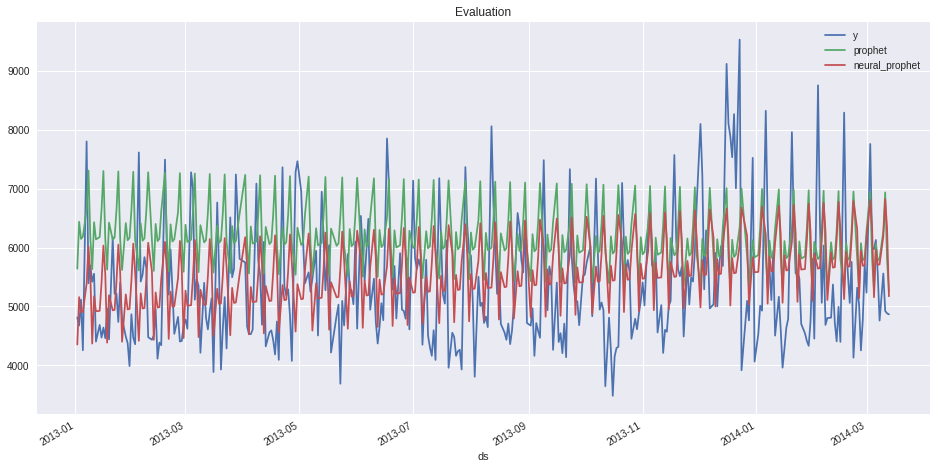

In [ ]:
print('--Mean Squared Error comparison--')
print(f"Prophet:\t{mean_squared_error(df_test['y'], df_test['prophet']):.4f}")
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'],  df_test['neural_prophet']):.4f}")
print('----------------------')
print('--Root Mean Absolute Error comparison--')
print(f"Prophet:\t{np.sqrt(mean_absolute_error(df_test['y'], df_test['prophet'])):.4f}")
print(f"NeuralProphet:\t{np.sqrt(mean_absolute_error(df_test['y'],  df_test['neural_prophet'])):.4f}")
print("----------------------")
print('--Mean Absolute Error comparison--')
print(f"Prophet:\t{mean_absolute_error(df_test['y'], df_test['prophet']):.4f}")
print(f"NeuralProphet:\t{mean_absolute_error(df_test['y'],  df_test['neural_prophet']):.4f}")

df_test.plot(title='Evaluation');

# **Conclusion**

In [ ]:
'''
    Here you can seen Neural Prophet clearly wins for this dataset

    Note:-
    we have run FbProphet in defualt mode plus only providing ds and y columns. we have twek epochs for Neural network
    default epochs are 180 we have bump it to 1000
    If we have lower than 500 epochs FbProphet will perform better

    Hence there is nothing call the best Algorithm as far as i have learn every dataset is unique.
    Maybe fbProphet will perform better on other dataset

    But NeuralProphet has pin point the weekness of FbProphet and try to improve it
    and i think it has done a great job
'''